In [19]:
%load_ext autoreload
%autoreload 2

import simplemir.fileutils as fu
import simplemir.music21utils as mu
from music21 import stream, note, tempo, key, meter, clef, analysis


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [78]:
# path = 'wtcbki'
# path = 'bach/wtc'
# path = 'bach/wtc/wtcbkii'
path = 'wtc_C'

pathList = fu.get_list_files(path, extension="xml")
scoreTuppleList = mu.get_scores_from_paths_json(pathList)
for i, e in enumerate(scoreTuppleList):
    print(i, e)
#     e[1].show()
# scoreTuppleList[1][1].show()


0 %
wtc_C/wtc1p09.xml
1 %
wtc_C/wtc1f16.xml
2 %
wtc_C/wtc1p07.xml
3 %
wtc_C/wtc1p21.xml
4 %
wtc_C/wtc1f07.xml
5 %
wtc_C/wtc2f16.xml
6 %
wtc_C/wtc1p23.xml
7 %
wtc_C/wtc2p06.xml
8 %
wtc_C/wtc2f02.xml
10 %
wtc_C/wtc2p13.xml
11 %
wtc_C/wtc2f09.xml
12 %
wtc_C/wtc1f17.xml
13 %
wtc_C/wtc1p15.xml
14 %
wtc_C/wtc1f15.xml
15 %
wtc_C/wtc2f22.xml
16 %
wtc_C/wtc2f08.xml
17 %
wtc_C/wtc1p18.xml
18 %
wtc_C/wtc2p12.xml
20 %
wtc_C/wtc1p19.xml
21 %
wtc_C/wtc1p16.xml
22 %
wtc_C/wtc1f03.xml
23 %
wtc_C/wtc1p02.xml
24 %
wtc_C/wtc2f10.xml
25 %
wtc_C/wtc2p07.xml
26 %
wtc_C/wtc1f11.xml
27 %
wtc_C/wtc2p14.xml
28 %
wtc_C/wtc1p04.xml
30 %
wtc_C/wtc1p17.xml
31 %
wtc_C/wtc2p03.xml
32 %
wtc_C/wtc2p24.xml
33 %
wtc_C/wtc1p14.xml
34 %
wtc_C/wtc2p21.xml
35 %
wtc_C/wtc1p01.xml
36 %
wtc_C/wtc2f04.xml
37 %
wtc_C/wtc1f12.xml
38 %
wtc_C/wtc1f08.xml
40 %
wtc_C/wtc2p19.xml
41 %
wtc_C/wtc1p13.xml
42 %
wtc_C/wtc1f05.xml
43 %
wtc_C/wtc2f24.xml
44 %
wtc_C/wtc2p08.xml
45 %
wtc_C/wtc1f20.xml
46 %
wtc_C/wtc1p22.xml
47 %
wtc_C/wtc1p11.x

In [79]:
len(scoreTuppleList)
allMeasures =[]
lastMetronomeMark = tempo.MetronomeMark()
lastKeysignature = key.KeySignature()
lastTimeSignature = meter.TimeSignature()
lastClef = clef.Clef()

for i,strm in enumerate(scoreTuppleList):
    path=strm['path']
    strmScore =strm['score']
    for p in strmScore.getElementsByClass(stream.Part):
        for m in p.getElementsByClass(stream.Measure):
#             print('-----------------')
#             print(m.keySignature)
            isActive = False
#             newMeasure =stream.Measure()
#             newMeasure.append(lastMetronomeMark)
#             newMeasure.append(lastKeysignature)
#             newMeasure.append(lastTimeSignature)
            for r in m.recurse():
                if type(r) == clef.TrebleClef:
#                     print(r)
                    lastClef =r
                if type(r) == clef.BassClef:
#                     print(r)
                    lastClef =r
                if type(r) == note.Note:
                    isActive = True
                if type(r) == tempo.MetronomeMark:
                    lastMetronomeMark = r
                if type(r) == key.KeySignature:
                    lastKeysignature = r
                if type(r) == meter.TimeSignature:
                    lastTimeSignature=r
#                 r.show('txt')
#                 newMeasure.append(r)
            try:
                m.insert(0,lastTimeSignature)
                m.insert(0,lastMetronomeMark)
                m.insert(0,lastKeysignature)
                m.insert(0,lastClef)
            except:
                True
#                 print('change')
            if isActive:
#                 allMeasures.append((path,p.partName,m.number,newMeasure))
#                 allMeasures.append((path,p.partName,m.number,m))
                obj = {
                    "path":path,
                    "part":p.partName,
                    "number":m.number,
                    "measure":m
                }
                allMeasures.append(obj)

print(len(allMeasures))
for a in allMeasures:
    print(a)


19278
{'path': 'wtc_C/wtc1p09.xml', 'part': 'Piano', 'number': 1, 'measure': <music21.stream.Measure 1 offset=0.0>}
{'path': 'wtc_C/wtc1p09.xml', 'part': 'Piano', 'number': 2, 'measure': <music21.stream.Measure 2 offset=6.0>}
{'path': 'wtc_C/wtc1p09.xml', 'part': 'Piano', 'number': 3, 'measure': <music21.stream.Measure 3 offset=12.0>}
{'path': 'wtc_C/wtc1p09.xml', 'part': 'Piano', 'number': 4, 'measure': <music21.stream.Measure 4 offset=18.0>}
{'path': 'wtc_C/wtc1p09.xml', 'part': 'Piano', 'number': 5, 'measure': <music21.stream.Measure 5 offset=24.0>}
{'path': 'wtc_C/wtc1p09.xml', 'part': 'Piano', 'number': 6, 'measure': <music21.stream.Measure 6 offset=30.0>}
{'path': 'wtc_C/wtc1p09.xml', 'part': 'Piano', 'number': 7, 'measure': <music21.stream.Measure 7 offset=36.0>}
{'path': 'wtc_C/wtc1p09.xml', 'part': 'Piano', 'number': 8, 'measure': <music21.stream.Measure 8 offset=42.0>}
{'path': 'wtc_C/wtc1p09.xml', 'part': 'Piano', 'number': 9, 'measure': <music21.stream.Measure 9 offset=48.0

{'path': 'wtc_C/wtc2f22.xml', 'part': 'Piano', 'number': 66, 'measure': <music21.stream.Measure 66 offset=390.0>}
{'path': 'wtc_C/wtc2f22.xml', 'part': 'Piano', 'number': 67, 'measure': <music21.stream.Measure 67 offset=396.0>}
{'path': 'wtc_C/wtc2f22.xml', 'part': 'Piano', 'number': 68, 'measure': <music21.stream.Measure 68 offset=402.0>}
{'path': 'wtc_C/wtc2f22.xml', 'part': 'Piano', 'number': 69, 'measure': <music21.stream.Measure 69 offset=408.0>}
{'path': 'wtc_C/wtc2f22.xml', 'part': 'Piano', 'number': 70, 'measure': <music21.stream.Measure 70 offset=414.0>}
{'path': 'wtc_C/wtc2f22.xml', 'part': 'Piano', 'number': 71, 'measure': <music21.stream.Measure 71 offset=420.0>}
{'path': 'wtc_C/wtc2f22.xml', 'part': 'Piano', 'number': 72, 'measure': <music21.stream.Measure 72 offset=426.0>}
{'path': 'wtc_C/wtc2f22.xml', 'part': 'Piano', 'number': 73, 'measure': <music21.stream.Measure 73 offset=432.0>}
{'path': 'wtc_C/wtc2f22.xml', 'part': 'Piano', 'number': 74, 'measure': <music21.stream.

{'path': 'wtc_C/wtc1f11.xml', 'part': 'Piano', 'number': 72, 'measure': <music21.stream.Measure 72 offset=106.5>}
{'path': 'wtc_C/wtc1f11.xml', 'part': 'Piano', 'number': 10, 'measure': <music21.stream.Measure 10 offset=13.5>}
{'path': 'wtc_C/wtc1f11.xml', 'part': 'Piano', 'number': 11, 'measure': <music21.stream.Measure 11 offset=15.0>}
{'path': 'wtc_C/wtc1f11.xml', 'part': 'Piano', 'number': 12, 'measure': <music21.stream.Measure 12 offset=16.5>}
{'path': 'wtc_C/wtc1f11.xml', 'part': 'Piano', 'number': 13, 'measure': <music21.stream.Measure 13 offset=18.0>}
{'path': 'wtc_C/wtc1f11.xml', 'part': 'Piano', 'number': 14, 'measure': <music21.stream.Measure 14 offset=19.5>}
{'path': 'wtc_C/wtc1f11.xml', 'part': 'Piano', 'number': 15, 'measure': <music21.stream.Measure 15 offset=21.0>}
{'path': 'wtc_C/wtc1f11.xml', 'part': 'Piano', 'number': 16, 'measure': <music21.stream.Measure 16 offset=22.5>}
{'path': 'wtc_C/wtc1f11.xml', 'part': 'Piano', 'number': 17, 'measure': <music21.stream.Measure

{'path': 'wtc_C/wtc2p21.xml', 'part': 'Harpsichord', 'number': 145, 'measure': <music21.stream.Measure 145 offset=432.0>}
{'path': 'wtc_C/wtc2p21.xml', 'part': 'Harpsichord', 'number': 146, 'measure': <music21.stream.Measure 146 offset=435.0>}
{'path': 'wtc_C/wtc2p21.xml', 'part': 'Harpsichord', 'number': 147, 'measure': <music21.stream.Measure 147 offset=438.0>}
{'path': 'wtc_C/wtc2p21.xml', 'part': 'Harpsichord', 'number': 148, 'measure': <music21.stream.Measure 148 offset=441.0>}
{'path': 'wtc_C/wtc2p21.xml', 'part': 'Harpsichord', 'number': 149, 'measure': <music21.stream.Measure 149 offset=444.0>}
{'path': 'wtc_C/wtc2p21.xml', 'part': 'Harpsichord', 'number': 150, 'measure': <music21.stream.Measure 150 offset=447.0>}
{'path': 'wtc_C/wtc2p21.xml', 'part': 'Harpsichord', 'number': 151, 'measure': <music21.stream.Measure 151 offset=450.0>}
{'path': 'wtc_C/wtc2p21.xml', 'part': 'Harpsichord', 'number': 152, 'measure': <music21.stream.Measure 152 offset=453.0>}
{'path': 'wtc_C/wtc2p21.

{'path': 'wtc_C/wtc2p05.xml', 'part': 'Harpsichord', 'number': 13, 'measure': <music21.stream.Measure 13 offset=48.0>}
{'path': 'wtc_C/wtc2p05.xml', 'part': 'Harpsichord', 'number': 14, 'measure': <music21.stream.Measure 14 offset=52.0>}
{'path': 'wtc_C/wtc2p05.xml', 'part': 'Harpsichord', 'number': 15, 'measure': <music21.stream.Measure 15 offset=56.0>}
{'path': 'wtc_C/wtc2p05.xml', 'part': 'Harpsichord', 'number': 16, 'measure': <music21.stream.Measure 16 offset=60.0>}
{'path': 'wtc_C/wtc2p05.xml', 'part': 'Harpsichord', 'number': 17, 'measure': <music21.stream.Measure 17 offset=64.0>}
{'path': 'wtc_C/wtc2p05.xml', 'part': 'Harpsichord', 'number': 18, 'measure': <music21.stream.Measure 18 offset=68.0>}
{'path': 'wtc_C/wtc2p05.xml', 'part': 'Harpsichord', 'number': 19, 'measure': <music21.stream.Measure 19 offset=72.0>}
{'path': 'wtc_C/wtc2p05.xml', 'part': 'Harpsichord', 'number': 20, 'measure': <music21.stream.Measure 20 offset=76.0>}
{'path': 'wtc_C/wtc2p05.xml', 'part': 'Harpsicho

{'path': 'wtc_C/wtc2p17.xml', 'part': 'Harpsichord', 'number': 15, 'measure': <music21.stream.Measure 15 offset=42.0>}
{'path': 'wtc_C/wtc2p17.xml', 'part': 'Harpsichord', 'number': 17, 'measure': <music21.stream.Measure 17 offset=48.0>}
{'path': 'wtc_C/wtc2p17.xml', 'part': 'Harpsichord', 'number': 22, 'measure': <music21.stream.Measure 22 offset=63.0>}
{'path': 'wtc_C/wtc2p17.xml', 'part': 'Harpsichord', 'number': 23, 'measure': <music21.stream.Measure 23 offset=66.0>}
{'path': 'wtc_C/wtc2p17.xml', 'part': 'Harpsichord', 'number': 26, 'measure': <music21.stream.Measure 26 offset=75.0>}
{'path': 'wtc_C/wtc2p17.xml', 'part': 'Harpsichord', 'number': 27, 'measure': <music21.stream.Measure 27 offset=78.0>}
{'path': 'wtc_C/wtc2p17.xml', 'part': 'Harpsichord', 'number': 32, 'measure': <music21.stream.Measure 32 offset=93.0>}
{'path': 'wtc_C/wtc2p17.xml', 'part': 'Harpsichord', 'number': 38, 'measure': <music21.stream.Measure 38 offset=111.0>}
{'path': 'wtc_C/wtc2p17.xml', 'part': 'Harpsich

{'path': 'wtc_C/wtc2f18.xml', 'part': 'Piano', 'number': 126, 'measure': <music21.stream.Measure 126 offset=375.0>}
{'path': 'wtc_C/wtc2f18.xml', 'part': 'Piano', 'number': 127, 'measure': <music21.stream.Measure 127 offset=378.0>}
{'path': 'wtc_C/wtc2f18.xml', 'part': 'Piano', 'number': 128, 'measure': <music21.stream.Measure 128 offset=381.0>}
{'path': 'wtc_C/wtc2f18.xml', 'part': 'Piano', 'number': 129, 'measure': <music21.stream.Measure 129 offset=384.0>}
{'path': 'wtc_C/wtc2f18.xml', 'part': 'Piano', 'number': 130, 'measure': <music21.stream.Measure 130 offset=387.0>}
{'path': 'wtc_C/wtc2f18.xml', 'part': 'Piano', 'number': 131, 'measure': <music21.stream.Measure 131 offset=390.0>}
{'path': 'wtc_C/wtc2f18.xml', 'part': 'Piano', 'number': 132, 'measure': <music21.stream.Measure 132 offset=393.0>}
{'path': 'wtc_C/wtc2f18.xml', 'part': 'Piano', 'number': 133, 'measure': <music21.stream.Measure 133 offset=396.0>}
{'path': 'wtc_C/wtc2f18.xml', 'part': 'Piano', 'number': 134, 'measure':

{'path': 'wtc_C/wtc1p12.xml', 'part': 'Piano', 'number': 5, 'measure': <music21.stream.Measure 5 offset=16.0>}
{'path': 'wtc_C/wtc1p12.xml', 'part': 'Piano', 'number': 6, 'measure': <music21.stream.Measure 6 offset=20.0>}
{'path': 'wtc_C/wtc1p12.xml', 'part': 'Piano', 'number': 7, 'measure': <music21.stream.Measure 7 offset=24.0>}
{'path': 'wtc_C/wtc1p12.xml', 'part': 'Piano', 'number': 8, 'measure': <music21.stream.Measure 8 offset=28.0>}
{'path': 'wtc_C/wtc1p12.xml', 'part': 'Piano', 'number': 9, 'measure': <music21.stream.Measure 9 offset=32.0>}
{'path': 'wtc_C/wtc1p12.xml', 'part': 'Piano', 'number': 10, 'measure': <music21.stream.Measure 10 offset=36.0>}
{'path': 'wtc_C/wtc1p12.xml', 'part': 'Piano', 'number': 11, 'measure': <music21.stream.Measure 11 offset=40.0>}
{'path': 'wtc_C/wtc1p12.xml', 'part': 'Piano', 'number': 12, 'measure': <music21.stream.Measure 12 offset=44.0>}
{'path': 'wtc_C/wtc1p12.xml', 'part': 'Piano', 'number': 13, 'measure': <music21.stream.Measure 13 offset=

In [80]:
print(len(allMeasures))
for a in allMeasures:
    print(a)
#     a[3].show('txt')

19278
{'path': 'wtc_C/wtc1p09.xml', 'part': 'Piano', 'number': 1, 'measure': <music21.stream.Measure 1 offset=0.0>}
{'path': 'wtc_C/wtc1p09.xml', 'part': 'Piano', 'number': 2, 'measure': <music21.stream.Measure 2 offset=6.0>}
{'path': 'wtc_C/wtc1p09.xml', 'part': 'Piano', 'number': 3, 'measure': <music21.stream.Measure 3 offset=12.0>}
{'path': 'wtc_C/wtc1p09.xml', 'part': 'Piano', 'number': 4, 'measure': <music21.stream.Measure 4 offset=18.0>}
{'path': 'wtc_C/wtc1p09.xml', 'part': 'Piano', 'number': 5, 'measure': <music21.stream.Measure 5 offset=24.0>}
{'path': 'wtc_C/wtc1p09.xml', 'part': 'Piano', 'number': 6, 'measure': <music21.stream.Measure 6 offset=30.0>}
{'path': 'wtc_C/wtc1p09.xml', 'part': 'Piano', 'number': 7, 'measure': <music21.stream.Measure 7 offset=36.0>}
{'path': 'wtc_C/wtc1p09.xml', 'part': 'Piano', 'number': 8, 'measure': <music21.stream.Measure 8 offset=42.0>}
{'path': 'wtc_C/wtc1p09.xml', 'part': 'Piano', 'number': 9, 'measure': <music21.stream.Measure 9 offset=48.0

{'path': 'wtc_C/wtc2f08.xml', 'part': 'Piano', 'number': 28, 'measure': <music21.stream.Measure 28 offset=108.0>}
{'path': 'wtc_C/wtc2f08.xml', 'part': 'Piano', 'number': 29, 'measure': <music21.stream.Measure 29 offset=112.0>}
{'path': 'wtc_C/wtc2f08.xml', 'part': 'Piano', 'number': 30, 'measure': <music21.stream.Measure 30 offset=116.0>}
{'path': 'wtc_C/wtc2f08.xml', 'part': 'Piano', 'number': 32, 'measure': <music21.stream.Measure 32 offset=124.0>}
{'path': 'wtc_C/wtc2f08.xml', 'part': 'Piano', 'number': 33, 'measure': <music21.stream.Measure 33 offset=128.0>}
{'path': 'wtc_C/wtc2f08.xml', 'part': 'Piano', 'number': 34, 'measure': <music21.stream.Measure 34 offset=132.0>}
{'path': 'wtc_C/wtc2f08.xml', 'part': 'Piano', 'number': 35, 'measure': <music21.stream.Measure 35 offset=136.0>}
{'path': 'wtc_C/wtc2f08.xml', 'part': 'Piano', 'number': 36, 'measure': <music21.stream.Measure 36 offset=140.0>}
{'path': 'wtc_C/wtc2f08.xml', 'part': 'Piano', 'number': 37, 'measure': <music21.stream.

{'path': 'wtc_C/wtc2p12.xml', 'part': 'Harpsichord', 'number': 99, 'measure': <music21.stream.Measure 99 offset=196.0>}
{'path': 'wtc_C/wtc2p12.xml', 'part': 'Harpsichord', 'number': 102, 'measure': <music21.stream.Measure 102 offset=202.0>}
{'path': 'wtc_C/wtc2p12.xml', 'part': 'Harpsichord', 'number': 112, 'measure': <music21.stream.Measure 112 offset=222.0>}
{'path': 'wtc_C/wtc2p12.xml', 'part': 'Harpsichord', 'number': 115, 'measure': <music21.stream.Measure 115 offset=228.0>}
{'path': 'wtc_C/wtc2p12.xml', 'part': 'Harpsichord', 'number': 116, 'measure': <music21.stream.Measure 116 offset=230.0>}
{'path': 'wtc_C/wtc2p12.xml', 'part': 'Harpsichord', 'number': 118, 'measure': <music21.stream.Measure 118 offset=234.0>}
{'path': 'wtc_C/wtc2p12.xml', 'part': 'Harpsichord', 'number': 120, 'measure': <music21.stream.Measure 120 offset=238.0>}
{'path': 'wtc_C/wtc2p12.xml', 'part': 'Harpsichord', 'number': 123, 'measure': <music21.stream.Measure 123 offset=244.0>}
{'path': 'wtc_C/wtc2p12.xm

{'path': 'wtc_C/wtc2p14.xml', 'part': 'Harpsichord', 'number': 41, 'measure': <music21.stream.Measure 41 offset=120.0>}
{'path': 'wtc_C/wtc2p14.xml', 'part': 'Harpsichord', 'number': 42, 'measure': <music21.stream.Measure 42 offset=123.0>}
{'path': 'wtc_C/wtc2p14.xml', 'part': 'Harpsichord', 'number': 1, 'measure': <music21.stream.Measure 1 offset=0.0>}
{'path': 'wtc_C/wtc2p14.xml', 'part': 'Harpsichord', 'number': 2, 'measure': <music21.stream.Measure 2 offset=3.0>}
{'path': 'wtc_C/wtc2p14.xml', 'part': 'Harpsichord', 'number': 4, 'measure': <music21.stream.Measure 4 offset=9.0>}
{'path': 'wtc_C/wtc2p14.xml', 'part': 'Harpsichord', 'number': 6, 'measure': <music21.stream.Measure 6 offset=15.0>}
{'path': 'wtc_C/wtc2p14.xml', 'part': 'Harpsichord', 'number': 7, 'measure': <music21.stream.Measure 7 offset=18.0>}
{'path': 'wtc_C/wtc2p14.xml', 'part': 'Harpsichord', 'number': 8, 'measure': <music21.stream.Measure 8 offset=21.0>}
{'path': 'wtc_C/wtc2p14.xml', 'part': 'Harpsichord', 'number'

{'path': 'wtc_C/wtc2p03.xml', 'part': 'Piano', 'number': 7, 'measure': <music21.stream.Measure 7 offset=24.0>}
{'path': 'wtc_C/wtc2p03.xml', 'part': 'Piano', 'number': 8, 'measure': <music21.stream.Measure 8 offset=28.0>}
{'path': 'wtc_C/wtc2p03.xml', 'part': 'Piano', 'number': 9, 'measure': <music21.stream.Measure 9 offset=32.0>}
{'path': 'wtc_C/wtc2p03.xml', 'part': 'Piano', 'number': 10, 'measure': <music21.stream.Measure 10 offset=36.0>}
{'path': 'wtc_C/wtc2p03.xml', 'part': 'Piano', 'number': 11, 'measure': <music21.stream.Measure 11 offset=40.0>}
{'path': 'wtc_C/wtc2p03.xml', 'part': 'Piano', 'number': 12, 'measure': <music21.stream.Measure 12 offset=44.0>}
{'path': 'wtc_C/wtc2p03.xml', 'part': 'Piano', 'number': 13, 'measure': <music21.stream.Measure 13 offset=48.0>}
{'path': 'wtc_C/wtc2p03.xml', 'part': 'Piano', 'number': 14, 'measure': <music21.stream.Measure 14 offset=52.0>}
{'path': 'wtc_C/wtc2p03.xml', 'part': 'Piano', 'number': 15, 'measure': <music21.stream.Measure 15 off

{'path': 'wtc_C/wtc2p21.xml', 'part': 'Harpsichord', 'number': 23, 'measure': <music21.stream.Measure 23 offset=66.0>}
{'path': 'wtc_C/wtc2p21.xml', 'part': 'Harpsichord', 'number': 24, 'measure': <music21.stream.Measure 24 offset=69.0>}
{'path': 'wtc_C/wtc2p21.xml', 'part': 'Harpsichord', 'number': 26, 'measure': <music21.stream.Measure 26 offset=75.0>}
{'path': 'wtc_C/wtc2p21.xml', 'part': 'Harpsichord', 'number': 28, 'measure': <music21.stream.Measure 28 offset=81.0>}
{'path': 'wtc_C/wtc2p21.xml', 'part': 'Harpsichord', 'number': 30, 'measure': <music21.stream.Measure 30 offset=87.0>}
{'path': 'wtc_C/wtc2p21.xml', 'part': 'Harpsichord', 'number': 31, 'measure': <music21.stream.Measure 31 offset=90.0>}
{'path': 'wtc_C/wtc2p21.xml', 'part': 'Harpsichord', 'number': 33, 'measure': <music21.stream.Measure 33 offset=96.0>}
{'path': 'wtc_C/wtc2p21.xml', 'part': 'Harpsichord', 'number': 34, 'measure': <music21.stream.Measure 34 offset=99.0>}
{'path': 'wtc_C/wtc2p21.xml', 'part': 'Harpsicho

{'path': 'wtc_C/wtc1f08.xml', 'part': 'Piano', 'number': 60, 'measure': <music21.stream.Measure 60 offset=236.0>}
{'path': 'wtc_C/wtc1f08.xml', 'part': 'Piano', 'number': 61, 'measure': <music21.stream.Measure 61 offset=240.0>}
{'path': 'wtc_C/wtc1f08.xml', 'part': 'Piano', 'number': 62, 'measure': <music21.stream.Measure 62 offset=244.0>}
{'path': 'wtc_C/wtc1f08.xml', 'part': 'Piano', 'number': 63, 'measure': <music21.stream.Measure 63 offset=248.0>}
{'path': 'wtc_C/wtc1f08.xml', 'part': 'Piano', 'number': 64, 'measure': <music21.stream.Measure 64 offset=252.0>}
{'path': 'wtc_C/wtc1f08.xml', 'part': 'Piano', 'number': 65, 'measure': <music21.stream.Measure 65 offset=256.0>}
{'path': 'wtc_C/wtc1f08.xml', 'part': 'Piano', 'number': 66, 'measure': <music21.stream.Measure 66 offset=260.0>}
{'path': 'wtc_C/wtc1f08.xml', 'part': 'Piano', 'number': 67, 'measure': <music21.stream.Measure 67 offset=264.0>}
{'path': 'wtc_C/wtc1f08.xml', 'part': 'Piano', 'number': 68, 'measure': <music21.stream.

{'path': 'wtc_C/wtc2p05.xml', 'part': 'Harpsichord', 'number': 70, 'measure': <music21.stream.Measure 70 offset=276.0>}
{'path': 'wtc_C/wtc2p05.xml', 'part': 'Harpsichord', 'number': 79, 'measure': <music21.stream.Measure 79 offset=312.0>}
{'path': 'wtc_C/wtc2p05.xml', 'part': 'Harpsichord', 'number': 81, 'measure': <music21.stream.Measure 81 offset=320.0>}
{'path': 'wtc_C/wtc2p05.xml', 'part': 'Harpsichord', 'number': 84, 'measure': <music21.stream.Measure 84 offset=332.0>}
{'path': 'wtc_C/wtc2p05.xml', 'part': 'Harpsichord', 'number': 85, 'measure': <music21.stream.Measure 85 offset=336.0>}
{'path': 'wtc_C/wtc2p05.xml', 'part': 'Harpsichord', 'number': 86, 'measure': <music21.stream.Measure 86 offset=340.0>}
{'path': 'wtc_C/wtc2p05.xml', 'part': 'Harpsichord', 'number': 88, 'measure': <music21.stream.Measure 88 offset=348.0>}
{'path': 'wtc_C/wtc2p05.xml', 'part': 'Harpsichord', 'number': 95, 'measure': <music21.stream.Measure 95 offset=376.0>}
{'path': 'wtc_C/wtc2p05.xml', 'part': 'H

{'path': 'wtc_C/wtc2p05.xml', 'part': 'Harpsichord', 'number': 108, 'measure': <music21.stream.Measure 108 offset=428.0>}
{'path': 'wtc_C/wtc2p05.xml', 'part': 'Harpsichord', 'number': 110, 'measure': <music21.stream.Measure 110 offset=436.0>}
{'path': 'wtc_C/wtc2p05.xml', 'part': 'Harpsichord', 'number': 111, 'measure': <music21.stream.Measure 111 offset=440.0>}
{'path': 'wtc_C/wtc2p05.xml', 'part': 'Harpsichord', 'number': 112, 'measure': <music21.stream.Measure 112 offset=444.0>}
{'path': 'wtc_C/wtc2p05.xml', 'part': 'Harpsichord', 'number': 7, 'measure': <music21.stream.Measure 7 offset=24.0>}
{'path': 'wtc_C/wtc2p05.xml', 'part': 'Harpsichord', 'number': 8, 'measure': <music21.stream.Measure 8 offset=28.0>}
{'path': 'wtc_C/wtc2p05.xml', 'part': 'Harpsichord', 'number': 13, 'measure': <music21.stream.Measure 13 offset=48.0>}
{'path': 'wtc_C/wtc2p05.xml', 'part': 'Harpsichord', 'number': 23, 'measure': <music21.stream.Measure 23 offset=88.0>}
{'path': 'wtc_C/wtc2p05.xml', 'part': 'H

{'path': 'wtc_C/wtc1f04.xml', 'part': 'Piano', 'number': 65, 'measure': <music21.stream.Measure 65 offset=256.0>}
{'path': 'wtc_C/wtc1f04.xml', 'part': 'Piano', 'number': 66, 'measure': <music21.stream.Measure 66 offset=260.0>}
{'path': 'wtc_C/wtc1f04.xml', 'part': 'Piano', 'number': 67, 'measure': <music21.stream.Measure 67 offset=264.0>}
{'path': 'wtc_C/wtc1f04.xml', 'part': 'Piano', 'number': 68, 'measure': <music21.stream.Measure 68 offset=268.0>}
{'path': 'wtc_C/wtc1f04.xml', 'part': 'Piano', 'number': 69, 'measure': <music21.stream.Measure 69 offset=272.0>}
{'path': 'wtc_C/wtc1f04.xml', 'part': 'Piano', 'number': 70, 'measure': <music21.stream.Measure 70 offset=276.0>}
{'path': 'wtc_C/wtc1f04.xml', 'part': 'Piano', 'number': 71, 'measure': <music21.stream.Measure 71 offset=280.0>}
{'path': 'wtc_C/wtc1f04.xml', 'part': 'Piano', 'number': 72, 'measure': <music21.stream.Measure 72 offset=284.0>}
{'path': 'wtc_C/wtc1f04.xml', 'part': 'Piano', 'number': 73, 'measure': <music21.stream.

{'path': 'wtc_C/wtc1f04.xml', 'part': 'Piano', 'number': 13, 'measure': <music21.stream.Measure 13 offset=48.0>}
{'path': 'wtc_C/wtc1f04.xml', 'part': 'Piano', 'number': 14, 'measure': <music21.stream.Measure 14 offset=52.0>}
{'path': 'wtc_C/wtc1f04.xml', 'part': 'Piano', 'number': 15, 'measure': <music21.stream.Measure 15 offset=56.0>}
{'path': 'wtc_C/wtc1f04.xml', 'part': 'Piano', 'number': 16, 'measure': <music21.stream.Measure 16 offset=60.0>}
{'path': 'wtc_C/wtc1f04.xml', 'part': 'Piano', 'number': 17, 'measure': <music21.stream.Measure 17 offset=64.0>}
{'path': 'wtc_C/wtc1f04.xml', 'part': 'Piano', 'number': 18, 'measure': <music21.stream.Measure 18 offset=68.0>}
{'path': 'wtc_C/wtc1f04.xml', 'part': 'Piano', 'number': 19, 'measure': <music21.stream.Measure 19 offset=72.0>}
{'path': 'wtc_C/wtc1f04.xml', 'part': 'Piano', 'number': 20, 'measure': <music21.stream.Measure 20 offset=76.0>}
{'path': 'wtc_C/wtc1f04.xml', 'part': 'Piano', 'number': 25, 'measure': <music21.stream.Measure 

{'path': 'wtc_C/wtc2f18.xml', 'part': 'Piano', 'number': 106, 'measure': <music21.stream.Measure 106 offset=315.0>}
{'path': 'wtc_C/wtc2f18.xml', 'part': 'Piano', 'number': 107, 'measure': <music21.stream.Measure 107 offset=318.0>}
{'path': 'wtc_C/wtc2f18.xml', 'part': 'Piano', 'number': 108, 'measure': <music21.stream.Measure 108 offset=321.0>}
{'path': 'wtc_C/wtc2f18.xml', 'part': 'Piano', 'number': 109, 'measure': <music21.stream.Measure 109 offset=324.0>}
{'path': 'wtc_C/wtc2f18.xml', 'part': 'Piano', 'number': 110, 'measure': <music21.stream.Measure 110 offset=327.0>}
{'path': 'wtc_C/wtc2f18.xml', 'part': 'Piano', 'number': 111, 'measure': <music21.stream.Measure 111 offset=330.0>}
{'path': 'wtc_C/wtc2f18.xml', 'part': 'Piano', 'number': 112, 'measure': <music21.stream.Measure 112 offset=333.0>}
{'path': 'wtc_C/wtc2f18.xml', 'part': 'Piano', 'number': 113, 'measure': <music21.stream.Measure 113 offset=336.0>}
{'path': 'wtc_C/wtc2f18.xml', 'part': 'Piano', 'number': 114, 'measure':

{'path': 'wtc_C/wtc2f15.xml', 'part': 'Piano', 'number': 38, 'measure': <music21.stream.Measure 38 offset=55.5>}
{'path': 'wtc_C/wtc2f15.xml', 'part': 'Piano', 'number': 39, 'measure': <music21.stream.Measure 39 offset=57.0>}
{'path': 'wtc_C/wtc2f15.xml', 'part': 'Piano', 'number': 40, 'measure': <music21.stream.Measure 40 offset=58.5>}
{'path': 'wtc_C/wtc2f15.xml', 'part': 'Piano', 'number': 41, 'measure': <music21.stream.Measure 41 offset=60.0>}
{'path': 'wtc_C/wtc2f15.xml', 'part': 'Piano', 'number': 42, 'measure': <music21.stream.Measure 42 offset=61.5>}
{'path': 'wtc_C/wtc2f15.xml', 'part': 'Piano', 'number': 43, 'measure': <music21.stream.Measure 43 offset=63.0>}
{'path': 'wtc_C/wtc2f15.xml', 'part': 'Piano', 'number': 44, 'measure': <music21.stream.Measure 44 offset=64.5>}
{'path': 'wtc_C/wtc2f15.xml', 'part': 'Piano', 'number': 45, 'measure': <music21.stream.Measure 45 offset=66.0>}
{'path': 'wtc_C/wtc2f15.xml', 'part': 'Piano', 'number': 46, 'measure': <music21.stream.Measure 

{'path': 'wtc_C/wtc2f01.xml', 'part': 'Piano', 'number': 39, 'measure': <music21.stream.Measure 39 offset=76.0>}
{'path': 'wtc_C/wtc2f01.xml', 'part': 'Piano', 'number': 40, 'measure': <music21.stream.Measure 40 offset=78.0>}
{'path': 'wtc_C/wtc2f01.xml', 'part': 'Piano', 'number': 41, 'measure': <music21.stream.Measure 41 offset=80.0>}
{'path': 'wtc_C/wtc2f01.xml', 'part': 'Piano', 'number': 42, 'measure': <music21.stream.Measure 42 offset=82.0>}
{'path': 'wtc_C/wtc2f01.xml', 'part': 'Piano', 'number': 43, 'measure': <music21.stream.Measure 43 offset=84.0>}
{'path': 'wtc_C/wtc2f01.xml', 'part': 'Piano', 'number': 44, 'measure': <music21.stream.Measure 44 offset=86.0>}
{'path': 'wtc_C/wtc2f01.xml', 'part': 'Piano', 'number': 45, 'measure': <music21.stream.Measure 45 offset=88.0>}
{'path': 'wtc_C/wtc2f01.xml', 'part': 'Piano', 'number': 46, 'measure': <music21.stream.Measure 46 offset=90.0>}
{'path': 'wtc_C/wtc2f01.xml', 'part': 'Piano', 'number': 47, 'measure': <music21.stream.Measure 

{'path': 'wtc_C/wtc2f14.xml', 'part': 'Piano', 'number': 14, 'measure': <music21.stream.Measure 14 offset=52.0>}
{'path': 'wtc_C/wtc2f14.xml', 'part': 'Piano', 'number': 15, 'measure': <music21.stream.Measure 15 offset=56.0>}
{'path': 'wtc_C/wtc2f14.xml', 'part': 'Piano', 'number': 16, 'measure': <music21.stream.Measure 16 offset=60.0>}
{'path': 'wtc_C/wtc2f14.xml', 'part': 'Piano', 'number': 17, 'measure': <music21.stream.Measure 17 offset=64.0>}
{'path': 'wtc_C/wtc2f14.xml', 'part': 'Piano', 'number': 18, 'measure': <music21.stream.Measure 18 offset=68.0>}
{'path': 'wtc_C/wtc2f14.xml', 'part': 'Piano', 'number': 19, 'measure': <music21.stream.Measure 19 offset=72.0>}
{'path': 'wtc_C/wtc2f14.xml', 'part': 'Piano', 'number': 20, 'measure': <music21.stream.Measure 20 offset=76.0>}
{'path': 'wtc_C/wtc2f14.xml', 'part': 'Piano', 'number': 21, 'measure': <music21.stream.Measure 21 offset=80.0>}
{'path': 'wtc_C/wtc2f14.xml', 'part': 'Piano', 'number': 22, 'measure': <music21.stream.Measure 

In [81]:
len(allMeasures)
import random

random.shuffle(allMeasures)
# print ("Reshuffled list : ",  allMeasures)


In [82]:
stream2 = stream.Stream()
for i, m in enumerate(allMeasures[0:90]):
    m['measure'].number = i+1
    stream2.append(m['measure'])

    streamRes = mu.remove_breaks(stream2)
# stream2.write('xml')

streamRes.write('xml')
# streamRes.show()
streamRes.show('midi')

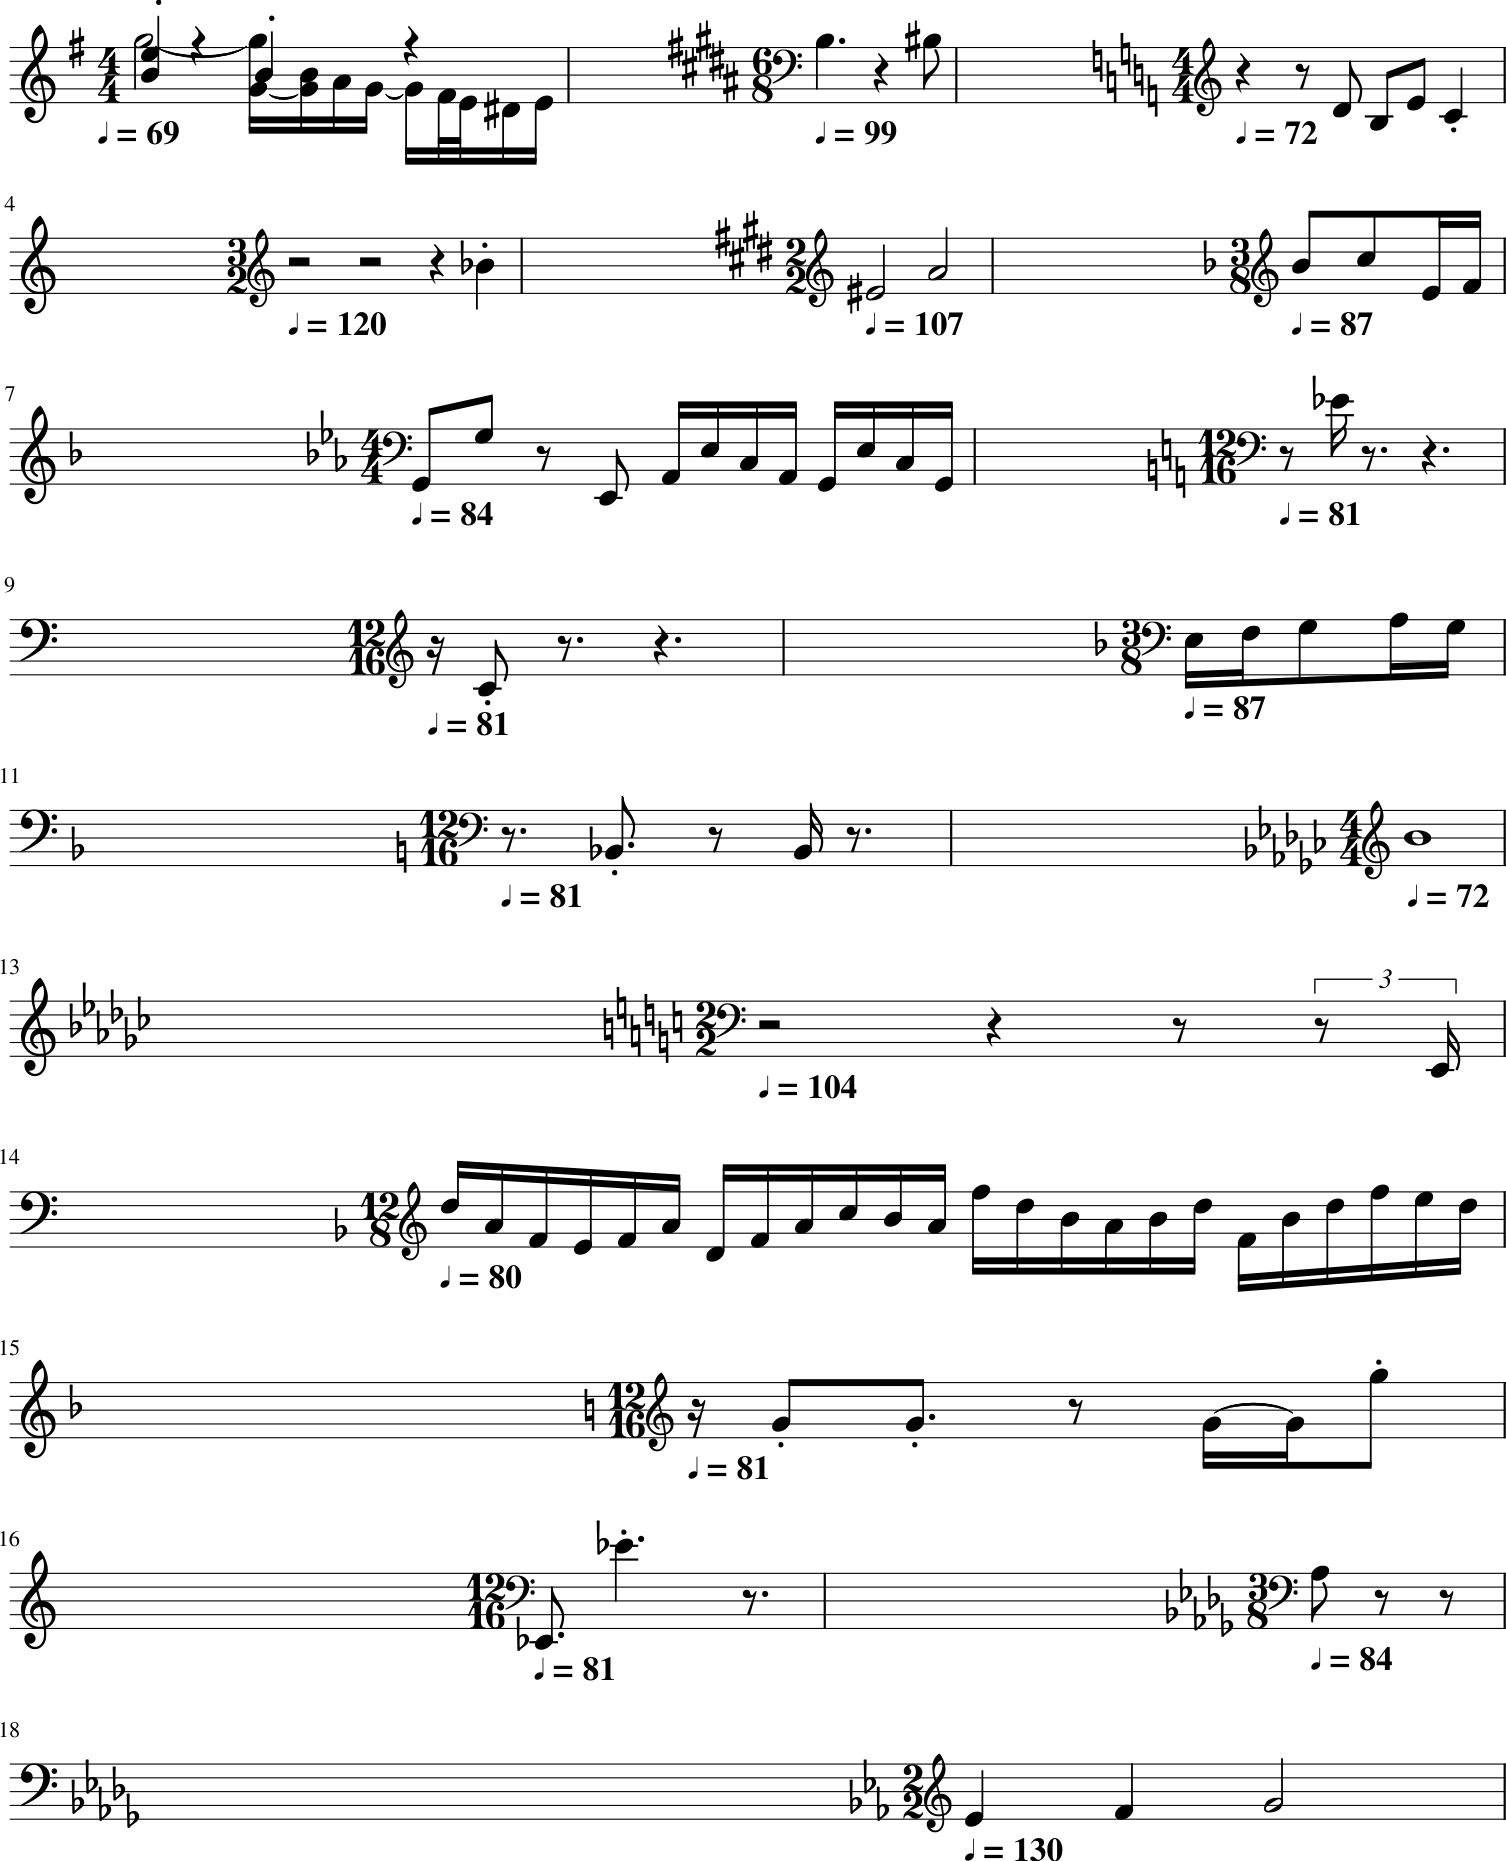

In [83]:
streamRes.show()

In [85]:
def numberNotes(strm):
    numNotes = 0
    for e in strm.recurse():
        if type(e) == note.Note:
            numNotes+=1
    return numNotes


In [ ]:

for i, m in enumerate(allMeasures):
    if i%100==0:
        print((100*i)//len(allMeasures),'%')
    measStrm = m['measure']
    descObj = {
        'numberNotes':numberNotes(measStrm),
        'key':measStrm.analyze('key').tonicPitchNameWithCase
    }
    m['descriptors']= descObj

for d in allMeasures:
    print(d)

0 %
0 %
1 %
1 %
2 %
2 %
3 %
3 %
4 %
4 %
5 %
5 %
6 %
6 %
7 %
7 %
8 %
8 %
9 %
9 %
10 %
10 %
11 %
11 %
12 %
12 %
13 %
14 %
14 %
15 %
15 %
16 %
16 %
17 %
17 %
18 %
18 %
19 %
19 %
20 %
20 %
21 %
21 %
22 %
22 %


In [ ]:
def sortNumNotes(meas): 
    return meas['descriptors']['numberNotes'] 

# allMeasures.sort(key=sortNumNotes,reverse=True)
allMeasures.sort(key=sortNumNotes,reverse=False)
for d in allMeasures:
    print(d)

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],[10, 2], [10, 4], [10, 0]])
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans.labels_
kmeans.predict([[0, 0], [12, 3]])
kmeans.cluster_centers_


In [ ]:
len(allMeasures)

In [ ]:
streamRes = stream.Stream()
partPiano = stream.Part()
for i, m in enumerate(allMeasures[0:90]):
    m['measure'].number = i+1
    partPiano.append(m['measure'])

partViolin=stream.Part()
for i, m in enumerate(allMeasures[300:390]):
    m['measure'].number = i+1
    partViolin.append(m['measure'])

partCello=stream.Part()
for i, m in enumerate(allMeasures[200:290]):
    m['measure'].number = i+1
    partCello.append(m['measure'])
    
streamRes.append(partPiano)
streamRes.append(partViolin)
streamRes.append(partCello)
streamRes = mu.remove_breaks(streamRes)


streamRes.write('xml')
# streamRes.show()
streamRes.show('midi')

In [ ]:
streamRes.show()
